<a href="https://colab.research.google.com/github/RakshithaK2001/Brain_Tumor_Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = []
paths = []
result = []
for r, d, f in os.walk(r'/content/drive/MyDrive/Internship/archive/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    
    if(img.shape == (128,128,3)):
        data.append(img)
        result.append(encoder.transform([[0]]).toarray())



In [5]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Internship/archive/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


In [6]:
data = np.array(data)

data.shape

(139, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape(139,2)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)


In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


2022-05-24 04:12:10.542666: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [11]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 11s 2s/step - loss: 45.5131 - val_loss: 38.5786
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 9.5919 - val_loss: 17.4325
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 5.0168 - val_loss: 19.1015
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 2.0834 - val_loss: 33.7020
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 1.9767 - val_loss: 15.3842
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 0.9434 - val_loss: 3.9433
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 0.6764 - val_loss: 2.6285
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 0.6593 - val_loss: 2.8350
Epoch 9/30
3/3 [==============================] - 7s 2s/step - loss: 0.6138 - val_loss: 4.2223
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 0.1896 - val_loss: 5.7055
Epoch 11/30
3/3 [=========================

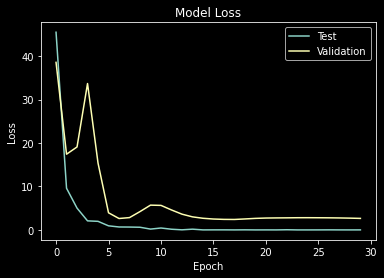

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()


In [13]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.99998807907104% Confidence This Is No, Its not a tumor


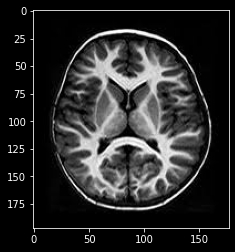

In [14]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Internship/archive/no/14 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.96389150619507% Confidence This Is A Its a Tumor


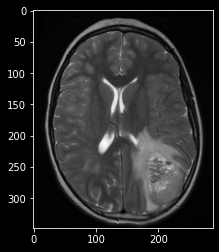

In [15]:
from matplotlib.pyplot import imshow
img = Image.open(r'/content/drive/MyDrive/Internship/archive/yes/Y100.JPG')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [16]:
import joblib
joblib.dump(model,'tumor_detection')

2022-05-24 04:16:38.403366: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://e2a50191-de7f-49d7-b00f-c3123980f729/assets


['tumor_detection']

In [17]:
import cv2
image_file=cv2.imread(r'/content/drive/MyDrive/Internship/archive/yes/Y10.jpg')
from google.colab.patches import cv2_imshow
im=Image.fromarray(image_file)

In [18]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install streamlit-option-menu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 712 kB 4.4 MB/s 


In [23]:
%%writefile app.py
import streamlit as st
from streamlit_option_menu import option_menu
import numpy as np
import joblib
import cv2
from PIL import Image
from matplotlib.pyplot import imshow
import warnings
import pandas as pd
import plotly.express as px

warnings.filterwarnings(action='ignore')
model=joblib.load('tumor_detection')

with st.sidebar:
  selected=option_menu(
      menu_title='Main_Menu',
      options=['Home','Upload']
  )

if selected=='Home':
  st.title('Tumor Detector')
  st.subheader("This is an app which detects Brain Tumor")
  st.image(r"/content/drive/MyDrive/Internship/Homepage.webp",width=800)

if selected=='Upload':
  st.title("YOU CAN UPLOAD THE IMAGE HERE")
  st.image(r"/content/drive/MyDrive/Internship/UploadImage.webp")
  image_file = st.file_uploader("Upload Images", type=["jpg"])
  
  try:
    img = Image.open(image_file)
    st.image(img)
    x = np.array(img.resize((128,128)))
    x = x.reshape(1,128,128,3)
    res = model.predict(x)
    confidence=res[0][classification]*100
    classification = np.where(res == np.amax(res))[1][0]
    data={'Tumor':['Not_present','present'],'confidence':[0,0]}
    df=pd.DataFrame(data)
    if classification==1:
      df.iloc[1,[1]] = confidence
      df.iloc[0,[1]] = 100-confidence
      bar_chart=px.bar()
      st.subheader('No tumor detected')
      st.write('The model prediction along with the confidence is plotted below')
      fig = px.bar(df, x='Tumor', y='confidence')
      st.plotly_chart(fig)
    else:
      df.iloc[1,[1]] = confidence
      df.iloc[0,[1]] = 100-confidence
      st.subheader('Tumor detected')
      st.write('The model prediction along with the confidence is plotted below')
      bar_chart=px.bar()
      fig = px.bar(df, x='Tumor', y='confidence')
      st.plotly_chart(fig)
  except:
    print("error")

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-05-24 04:32:51.880 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.849s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.236.173.103:8501

your url is: https://lucky-fans-buy-35-236-173-103.loca.lt
2022-05-24 04:33:31.201097: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
